In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
plt.rcParams['figure.dpi'] = 125

In [24]:
df = pd.read_csv("2018.csv")

In [25]:
print(f'Shape of the data {df.shape}')
print("--------------------------------------------------------------------------------------//")
print(df.describe)
print("--------------------------------------------------------------------------------------//")
print(df.info())
print("--------------------------------------------------------------------------------------//")
df.head()

Shape of the data (6667, 14)
--------------------------------------------------------------------------------------//
<bound method NDFrame.describe of          NO    TANGGAL         WAKTU  LINTANG      BUJUR     KEDA    Mag   \
0        1.0  1/1/2018  00:43:05 UTC  11.65 LS  117.61 BT   10 Km  4.2 SR   
1        2.0  1/1/2018  00:52:32 UTC   0.33 LS  123.73 BT  112 Km  5.1 SR   
2        3.0  1/1/2018  02:47:53 UTC    1.4 LS  120.47 BT   10 Km  2.4 SR   
3        4.0  1/1/2018  03:03:26 UTC   9.42 LS   117.9 BT   24 Km  2.4 SR   
4        5.0  1/1/2018  03:07:09 UTC   1.42 LU  122.04 BT   17 Km  1.9 SR   
...      ...       ...           ...       ...        ...     ...     ...   
6662  1289.0  8/3/2018  21:17:24 UTC   8.46 LS  116.53 BT   10 Km  2.2 SR   
6663  1289.0  8/3/2018  21:28:19 UTC   8.71 LS  116.36 BT   10 Km  2.5 SR   
6664  1289.0  8/3/2018  22:09:47 UTC    9.5 LS  120.77 BT   68 Km    4 SR   
6665  1289.0  8/3/2018  23:56:38 UTC   8.58 LS  116.49 BT   17 Km  2.9 SR   
6

,NO,TANGGAL,WAKTU,LINTANG,BUJUR,KEDA,Mag,TypeMag,smaj,smin,az,rms,cPhase,Region
0,1.0,1/1/2018,00:43:05 UTC,11.65 LS,117.61 BT,10 Km,4.2 SR,MLv,7.912,2.807,233,0.581,14,"South of Sumbawa, Indonesia"
1,2.0,1/1/2018,00:52:32 UTC,0.33 LS,123.73 BT,112 Km,5.1 SR,MLv,10.316,0.932,54,0.904,39,"Minahassa Peninsula, Sulawesi"
2,3.0,1/1/2018,02:47:53 UTC,1.4 LS,120.47 BT,10 Km,2.4 SR,MLv,3.220,1.196,137,0.682,5,"Sulawesi, Indonesia"
3,4.0,1/1/2018,03:03:26 UTC,9.42 LS,117.9 BT,24 Km,2.4 SR,MLv,1.206,0.596,279,0.122,6,"Sumbawa Region, Indonesia"
4,5.0,1/1/2018,03:07:09 UTC,1.42 LU,122.04 BT,17 Km,1.9 SR,MLv,1.299,0.533,232,0.027,5,"Minahassa Peninsula, Sulawesi"


In [26]:
df["Region"].value_counts()

Sumbawa Region, Indonesia        835
Minahassa Peninsula, Sulawesi    736
Java, Indonesia                  608
Banda Sea                        323
Southern Sumatra, Indonesia      313
                                ... 
Northeastern China                 1
Kyrgyzstan                         1
South of Australia                 1
Eastern Caucasus                   1
Bering Sea                         1
Name: Region, Length: 206, dtype: int64

In [27]:
df_sumbawa_info = df[df["Region"] == "Sumbawa Region, Indonesia"]

In [28]:
df_sumbawa = df_sumbawa_info.iloc[:,[3,4,6]]
df_sumbawa.head()

,LINTANG,BUJUR,Mag
3,9.42 LS,117.9 BT,2.4 SR
18,9.48 LS,118.11 BT,3.1 SR
45,8.74 LS,118.35 BT,2.9 SR
46,8.68 LS,118.36 BT,3.3 SR
64,9.96 LS,116.59 BT,3.6 SR


In [42]:
df_sumbawa.rename(columns={" LINTANG " : "lintang", " BUJUR " : "bujur", " Mag " : "magnitude"}, inplace = True)
df_sumbawa.columns

Index(['lintang', 'bujur', 'magnitude'], dtype='object')

In [44]:
# df_sumbawa[df_sumbawa['lintang'].str.contains(" LS")].value_counts
# df_sumbawa[df_sumbawa['lintang'].str.contains(" LU")].value_counts
# df_sumbawa[df_sumbawa['bujur'].str.contains(" BU")].value_counts
# df_sumbawa[df_sumbawa['bujur'].str.contains(" BT")].value_counts

#count for the latitude longitude of the most frequent earthquake

In [45]:
df_sumbawa["lintang"] = df_sumbawa["lintang"].str.replace(" LS", "")
df_sumbawa["lintang"] = df_sumbawa["lintang"].str.replace(" LU", "")
df_sumbawa["bujur"] = df_sumbawa["bujur"].str.replace(" BT", "")
df_sumbawa["bujur"] = df_sumbawa["bujur"].str.replace(" BB", "")
df_sumbawa["magnitude"] = df_sumbawa["magnitude"].str.replace(" SR", "")


C:\Users\San-Z30\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [46]:
df_sumbawa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835 entries, 3 to 6666
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   lintang    835 non-null    object
 1   bujur      835 non-null    object
 2   magnitude  835 non-null    object
dtypes: object(3)
memory usage: 26.1+ KB


In [47]:
for colname in df_sumbawa:
    df_sumbawa[colname] = df_sumbawa[colname].astype("float")

df_sumbawa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835 entries, 3 to 6666
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lintang    835 non-null    float64
 1   bujur      835 non-null    float64
 2   magnitude  835 non-null    float64
dtypes: float64(3)
memory usage: 26.1 KB


In [48]:
df_sumbawa.head()

,lintang,bujur,magnitude
3,9.42,117.90,2.4
18,9.48,118.11,3.1
45,8.74,118.35,2.9
46,8.68,118.36,3.3
64,9.96,116.59,3.6


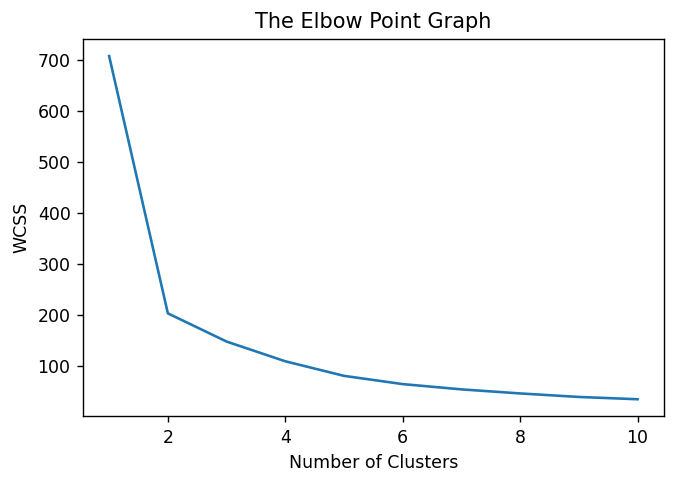

In [59]:
cluster = df_sumbawa.iloc[:,[0,1]].values
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(cluster)

  wcss.append(kmeans.inertia_)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel="Number of Clusters", ylabel="WCSS")
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')

plt.show()
#show the optimal number of clusters

In [60]:
#the optimal number is 2 (shown on the figure above, when on cluster 2 the wcss value significantly change too!)
kmeans = KMeans(n_clusters= 2, init='k-means++', random_state=42)
Y = kmeans.fit_predict(df_sumbawa)
print(np.unique(Y))

[0 1]


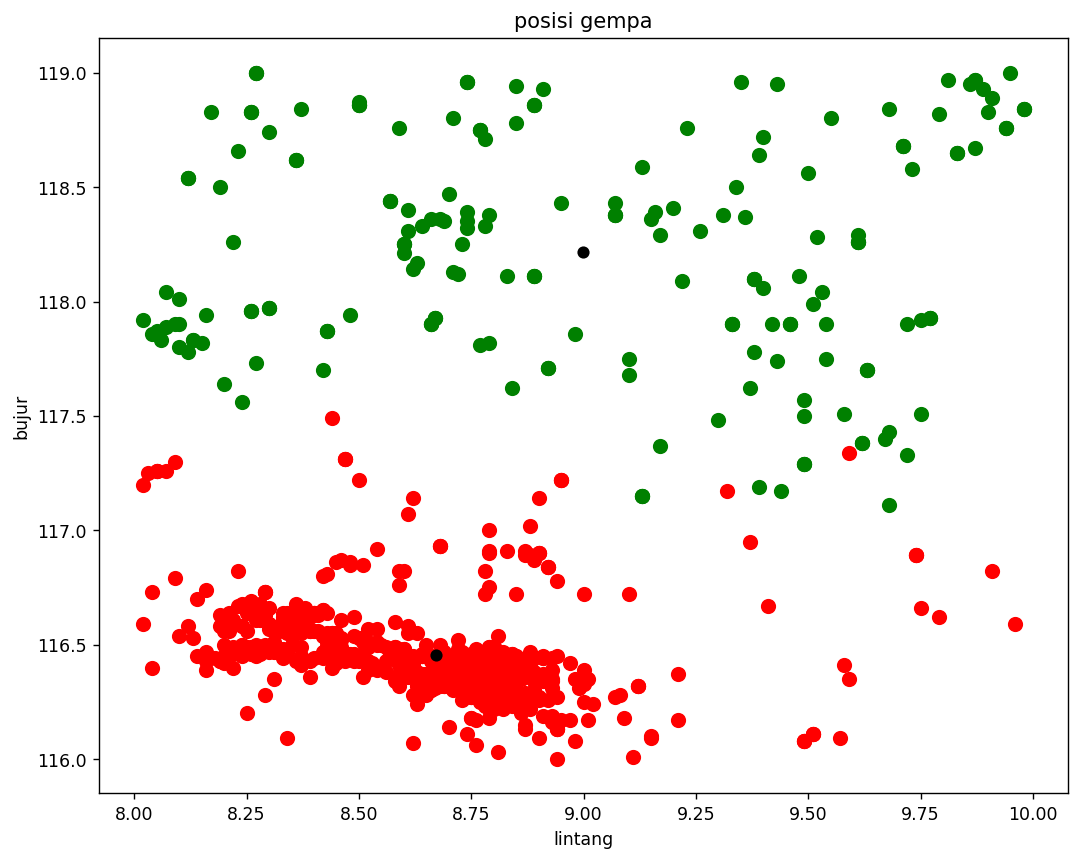

In [61]:
plt.figure(figsize=(10,8))
plt.scatter(cluster[Y==0,0], cluster[Y==0,1], s=60, c='green', label='Cluster 1')
plt.scatter(cluster[Y==1,0], cluster[Y==1,1], s=60, c='red', label='Cluster 2')
# plt.scatter(cluster[Y==2,0], cluster[Y==2,1], s=60, c='lime', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

plt.title('posisi gempa')
plt.xlabel('lintang')
plt.ylabel('bujur')
plt.show()